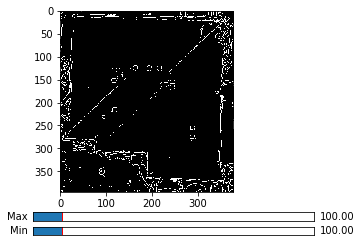

In [19]:
import cv2
import numpy as np
from matplotlib.widgets import Slider
import matplotlib.pyplot as plt

fig = plt.figure();
ax = fig.add_subplot(111);
fig.subplots_adjust(bottom=0.25);
threshold1 = 100;
threshold2 = 100;

#img = cv2.imread("house_export.png",0)
# img = cv2.imread("images/simple_original.png")
img = cv2.imread("images/3d_house.png")
#main.append(file)
#Kmeans image segmentation
vectorized = img.reshape((-1, 3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts = 11
img_1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
ret, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
#final image
result_image = res.reshape((img_1.shape))

canny = cv2.Canny(img,threshold1,threshold2)

im1 = ax.imshow(canny,'gray')

axcolor = 'lightgoldenrodyellow'
axmin = fig.add_axes([0.25, 0.1, 0.65, 0.03])
axmax  = fig.add_axes([0.25, 0.15, 0.65, 0.03])

smin = Slider(axmin, 'Min', 0, 1000, valinit=threshold1)
smax = Slider(axmax, 'Max', 0, 1000, valinit=threshold2)

def update(val):
    canny = cv2.Canny(img,smin.val,smax.val)
    im1 = ax.imshow(canny,'gray')
    fig.canvas.draw()

smin.on_changed(update)
smax.on_changed(update)

plt.show()